# Exploring DNN Fits

## Configuration

In [2]:
import sys
sys.path.extend(['..', '../bprime'])
    
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
import os
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bprime.learn import LearnedFunction, LearnedB
from bprime.theory import bgs_segment, bgs_rec
from bprime.plots import bhat_plot, loss_plot, loss_limits_plot
from bprime.plots import b_learn_diagnostic_plot, rate_plot, arch_loss_plot
from bprime.nb_utils import load_learnedfuncs_in_dir
os.environ["CUDA_VISIBLE_DEVICES"]="1,1"

In [4]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

In [6]:
FIT_DIR = '../data/msprime_sims/fits/'

models = os.listdir(FIT_DIR)

res = {m: load_learnedfuncs_in_dir(os.path.join(FIT_DIR, m)) for m in models}

res.keys()

dict_keys(['simple_varL_varrbp', 'simple', 'segment_uniform_mu', 'segment', 'simple_varL', 'segment_largesample'])

Throughout we use a single architecture that has a fair amount of capacity.

In [10]:
ARCH = (8, 4)

## Simple BGS model

First we look at the simple BGS model, which just includes the total fixed recombination fraction. This is the same as `bgs_rec()` in the `bprime.theory` module.

The model is:

$$B_\mathrm{rec} = \exp\left({\frac{-\mu L}{(t(1+(1-t)r_\mathrm{BP}/t)^2)}}\right)$$

where $t = sh$.

### Variable $\mu$ and $t$

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial


(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 0, n32 = 2'}, xlabel='epoch'>)

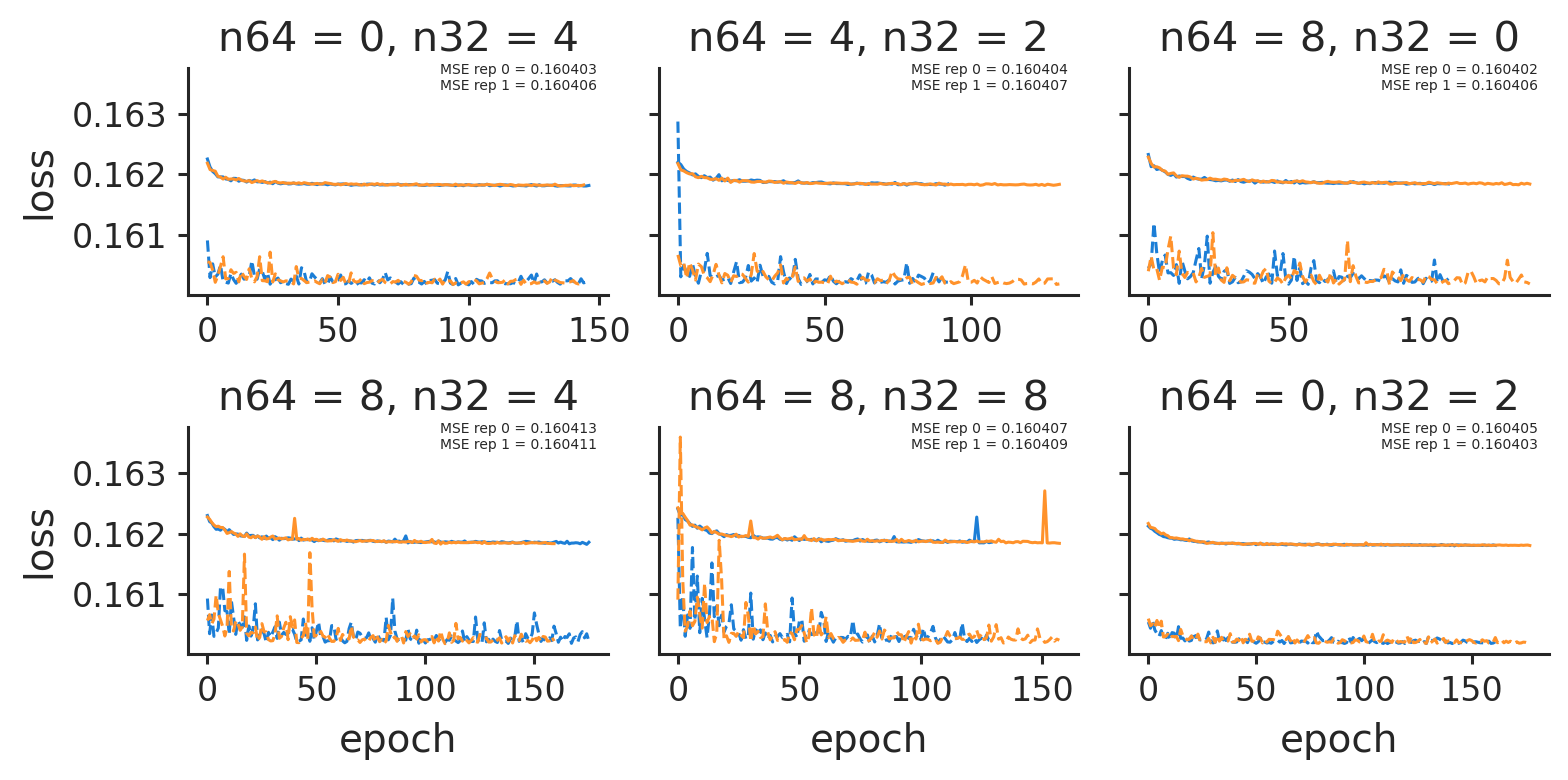

In [7]:
arch_loss_plot(res['simple'])

Really not much of a difference here -- it's fairly insensitive to the architecture for this simple function.

In [9]:
res['simple'].keys()

dict_keys([(0, 4), (4, 2), (8, 0), (8, 4), (8, 8), (0, 2)])

In [7]:
best_func = res[ARCH][0]

b = LearnedB(model='rec')
b.func = best_func

making 100x100 grid...	done.
313/313 [==============================] - 0s 1000us/step
using cached predictions
using cached predictions
using cached predictions


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:>, <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

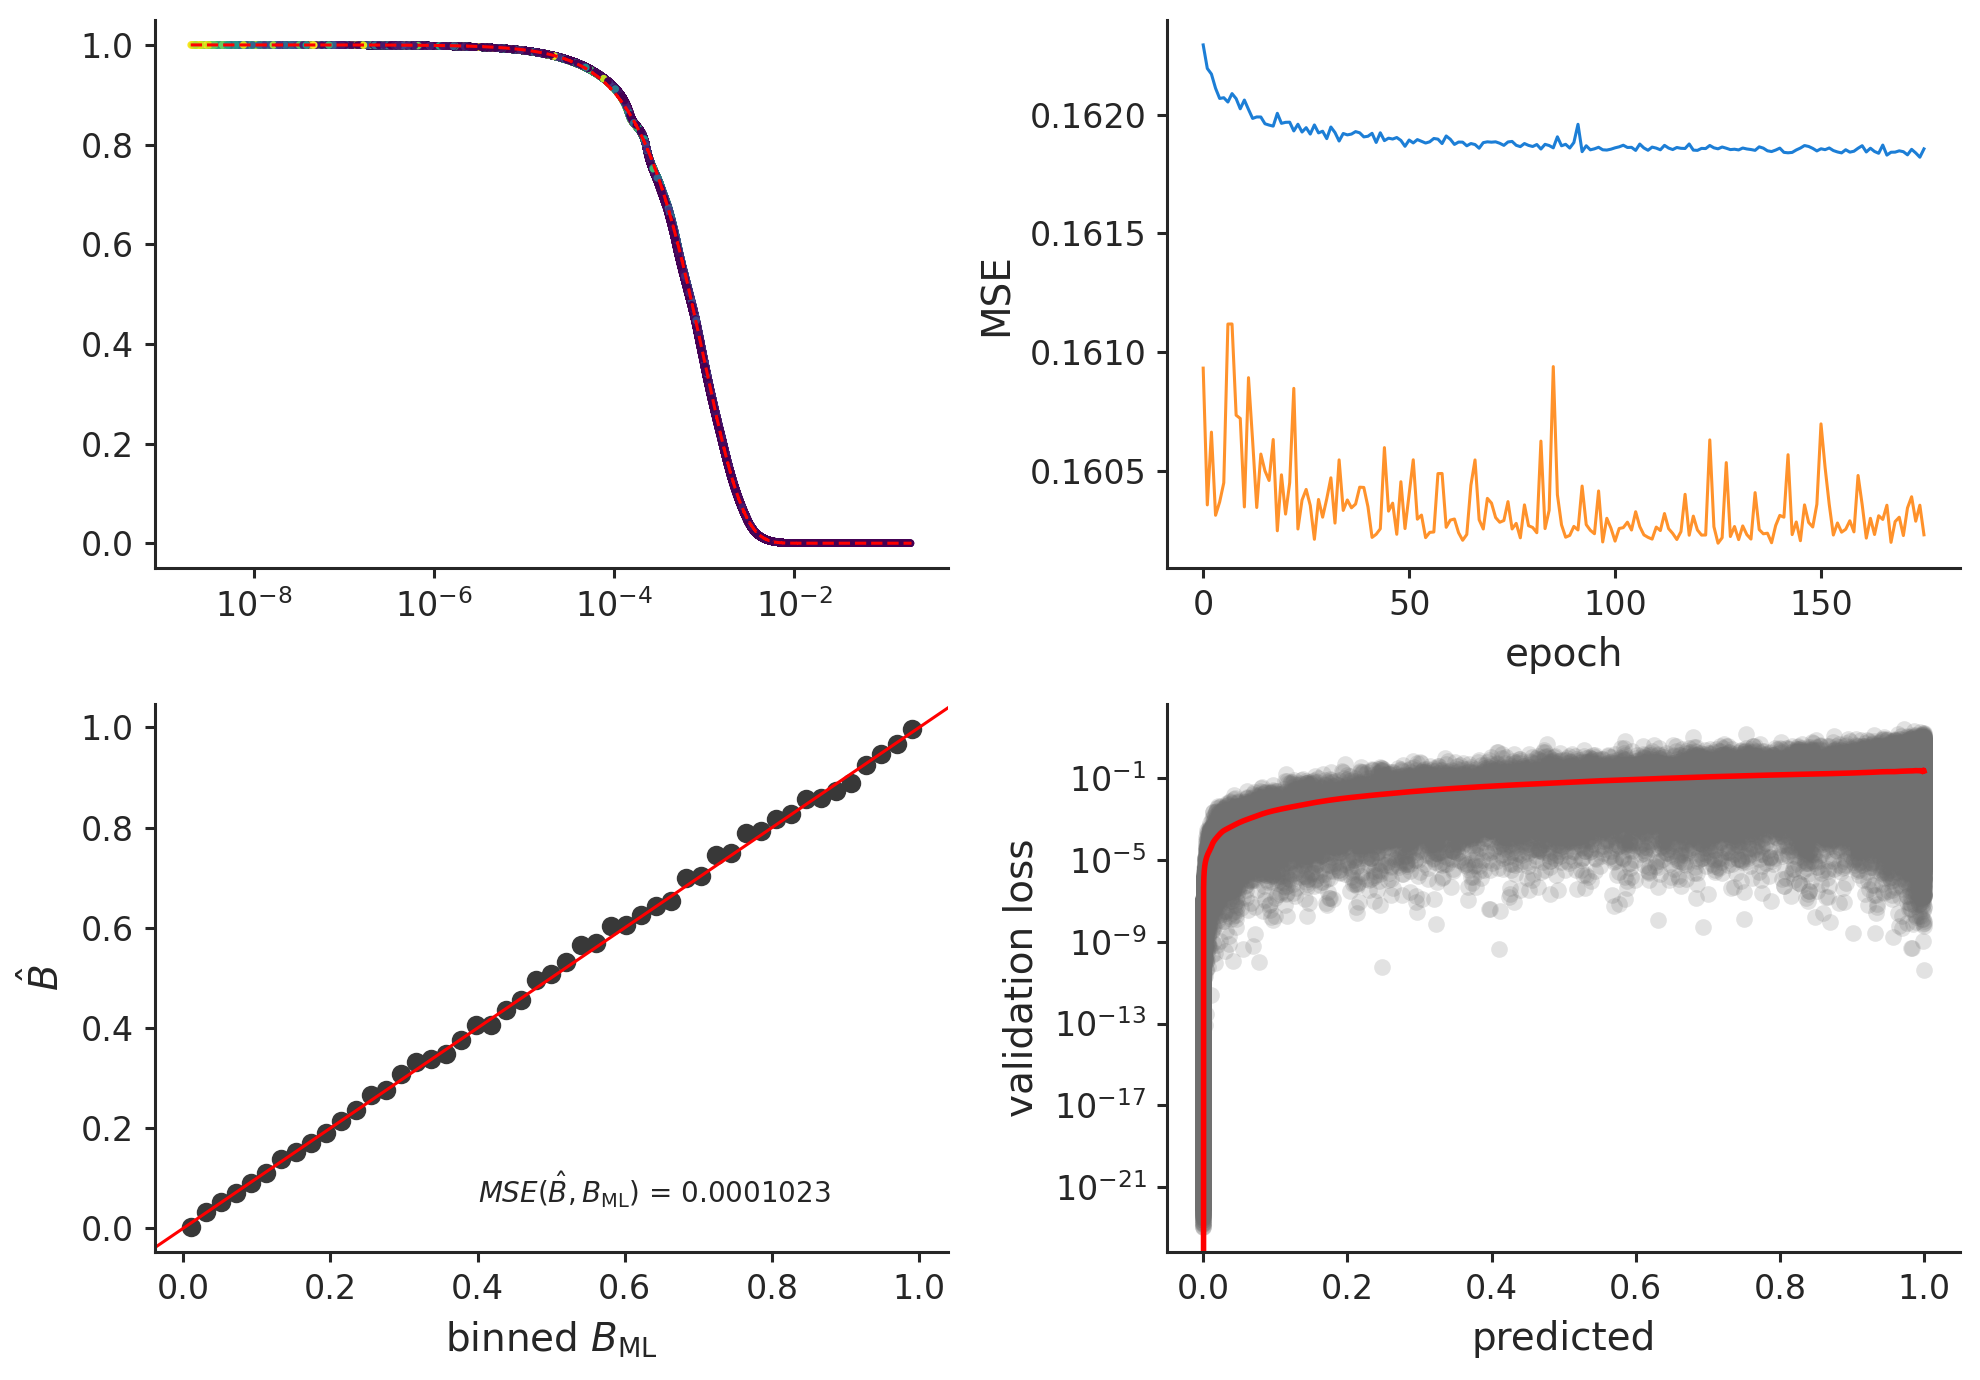

In [8]:
b_learn_diagnostic_plot(b, n={'mu': 100, 'sh': 100}, c='sh')

In [9]:
FIT_DIR = '../data/msprime_sims/fits/simple_varL_varrbp/'
res = load_learnedfuncs_in_dir(FIT_DIR)

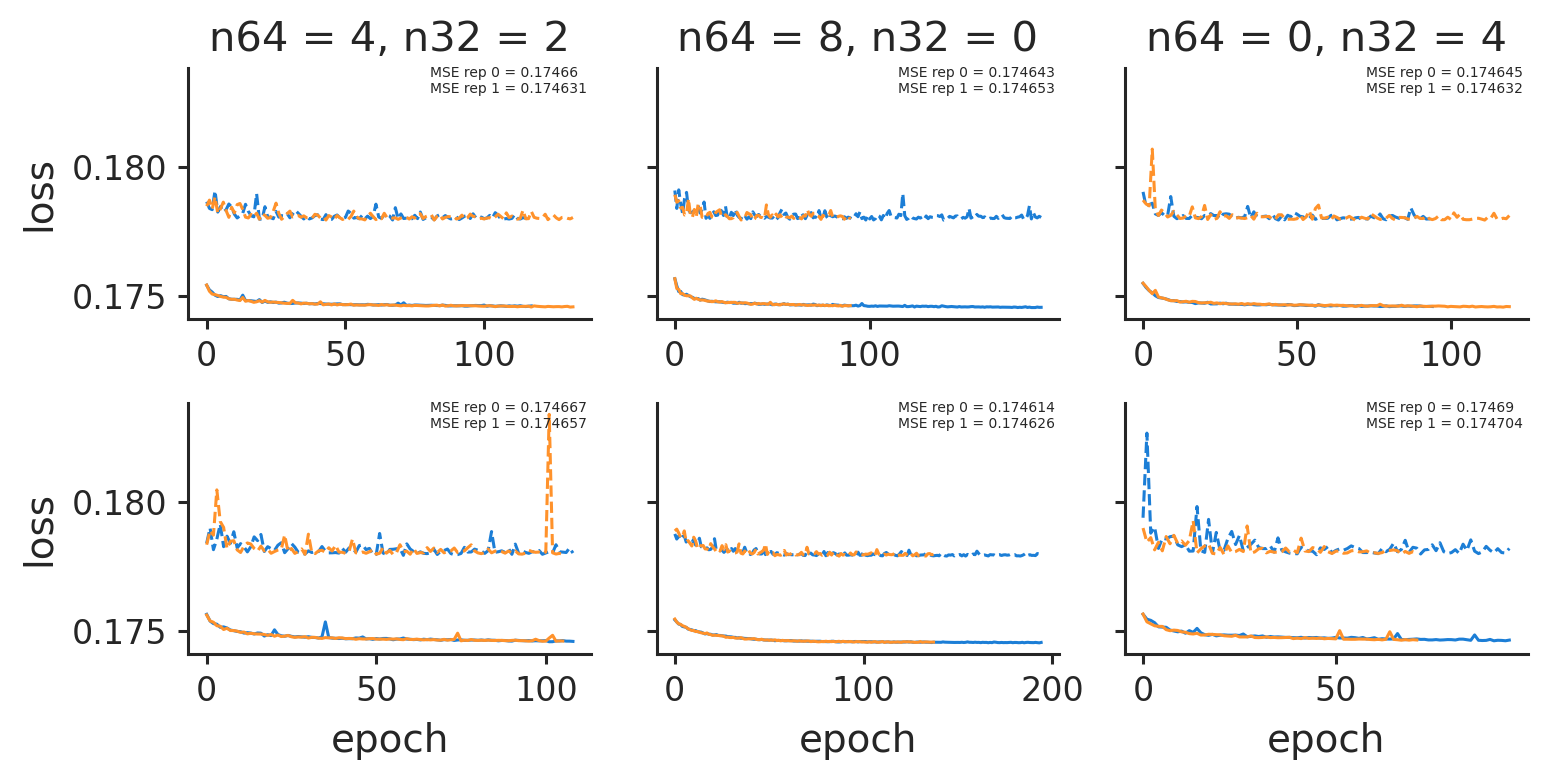

In [10]:
arch_loss_plot(res)

In [11]:
best_func_varL_varrbp = res[((8, 4))][0]

bLrbp = LearnedB(model='rec')
bLrbp.func = best_func_varL_varrbp

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:>, <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

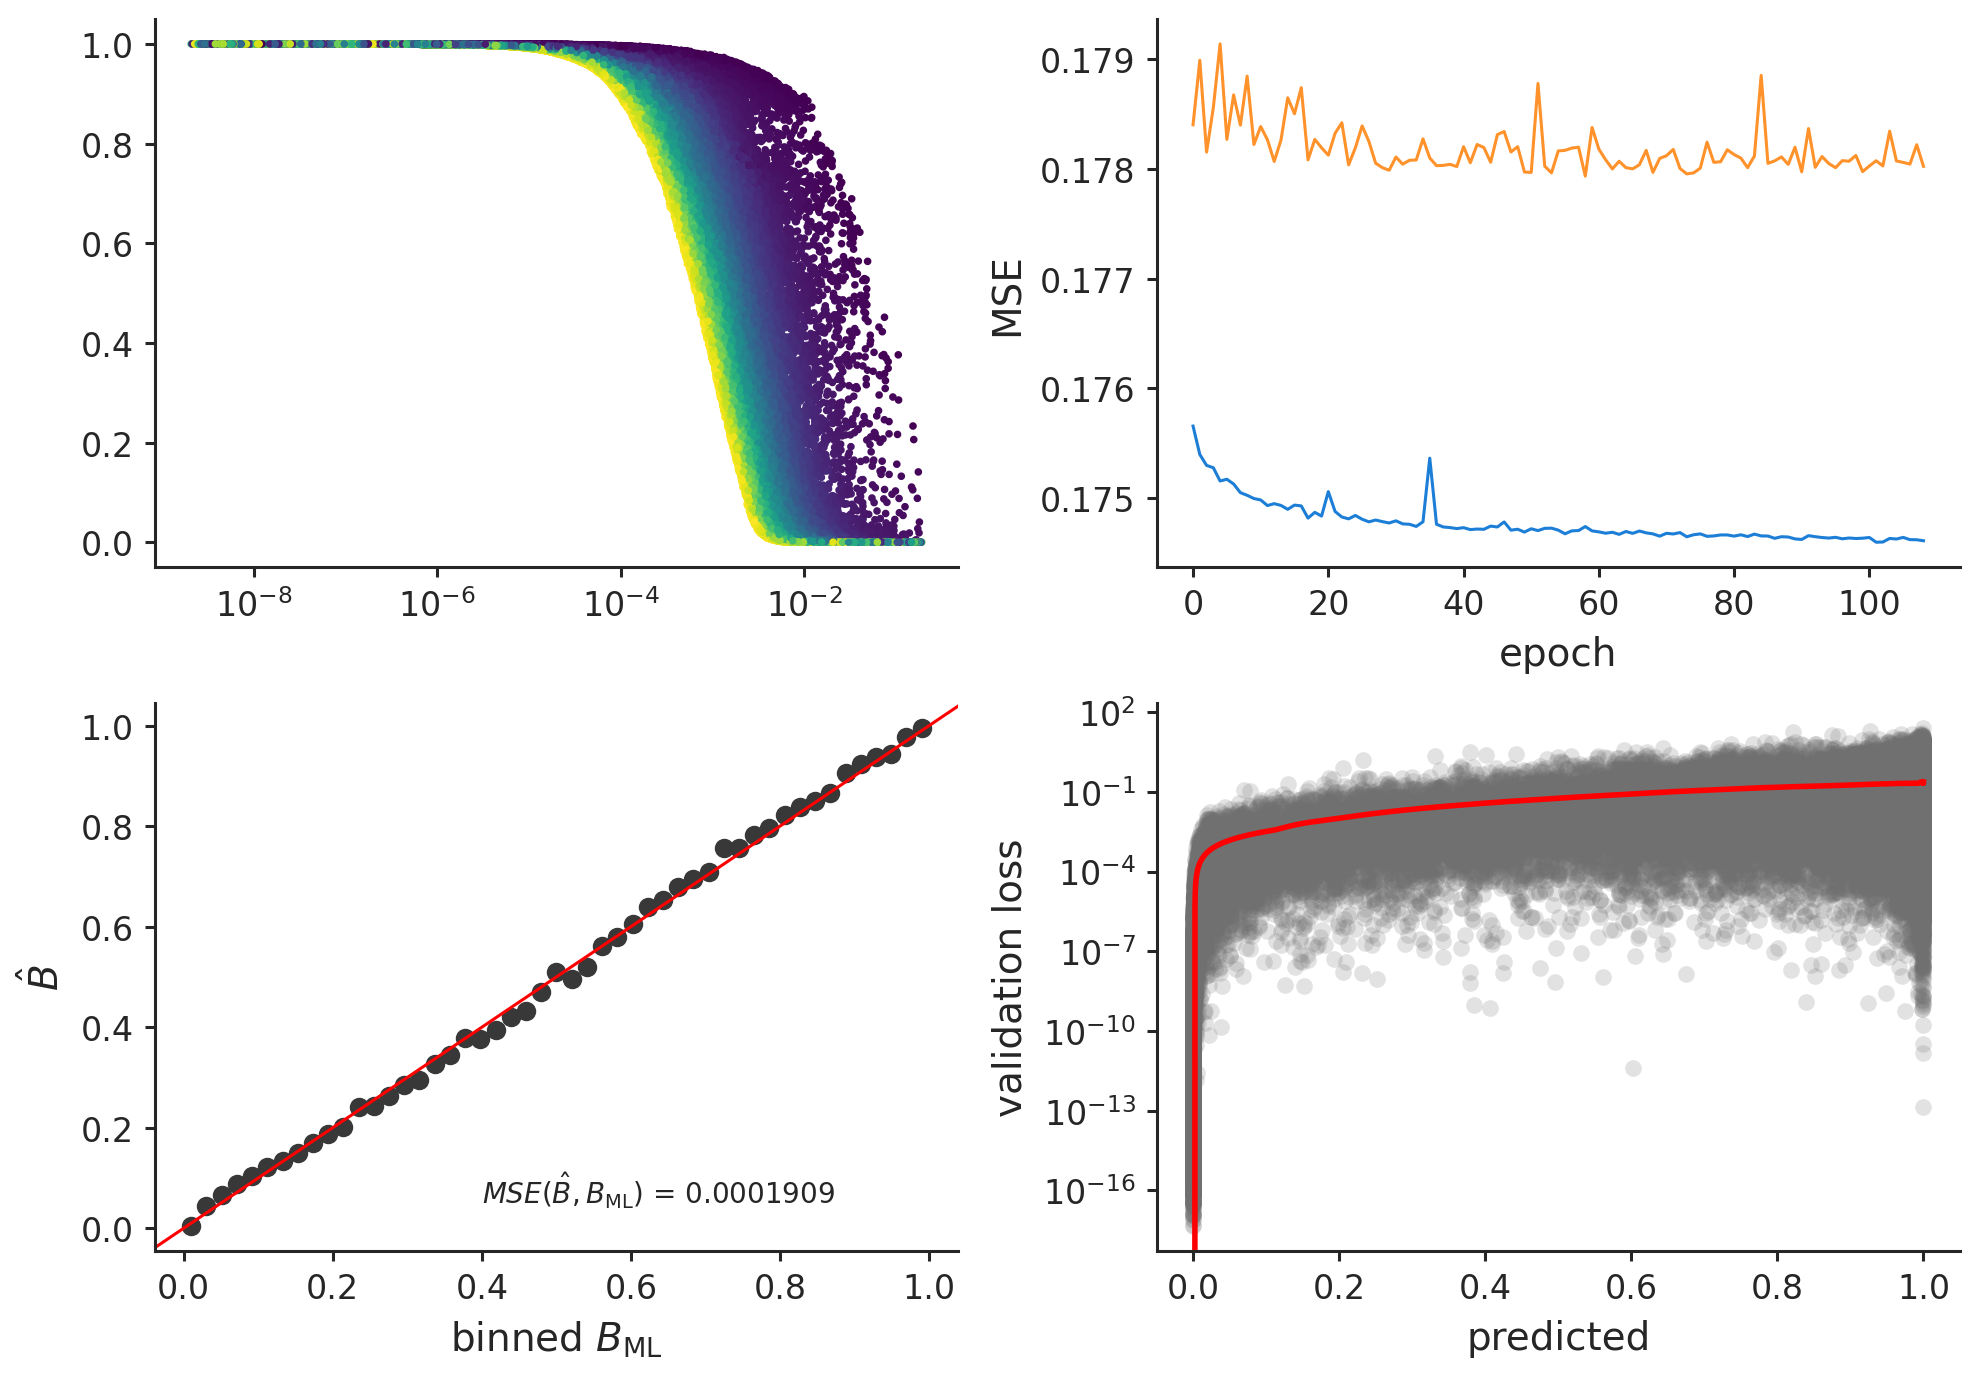

In [12]:
b_learn_diagnostic_plot(bLrbp, n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10}, c='L', add_theory=False)

In [66]:
FIT_DIR = '../data/msprime_sims/fits/segment_largesample/'
res = load_learnedfuncs_in_dir(FIT_DIR)

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 4'}, xlabel='epoch'>)

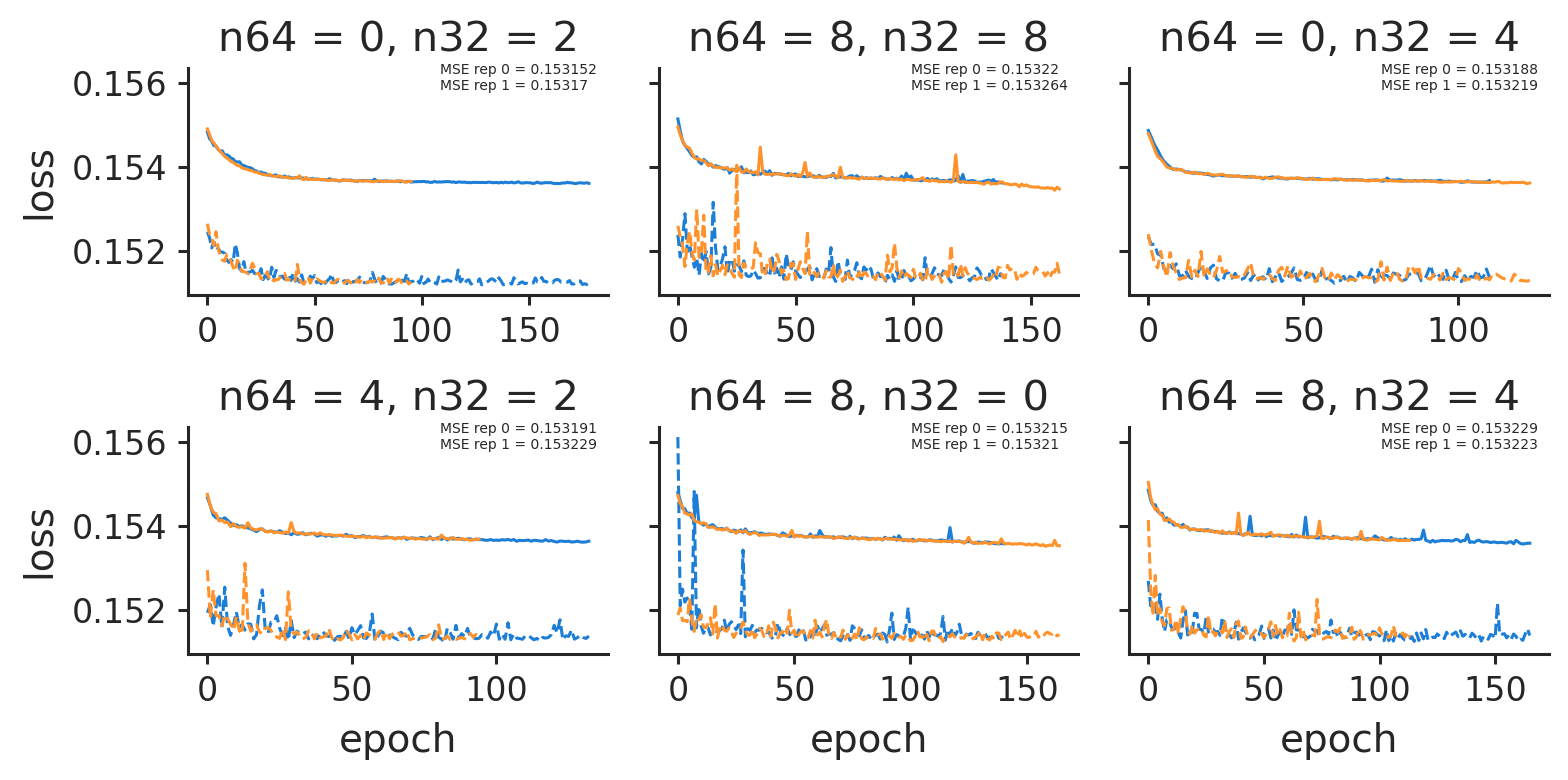

In [67]:
arch_loss_plot(res)

In [68]:
best_func_seg = res[((0, 2))][0]

bseg = LearnedB(model='segment')
bseg.func = best_func_seg

using cached predictions
using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

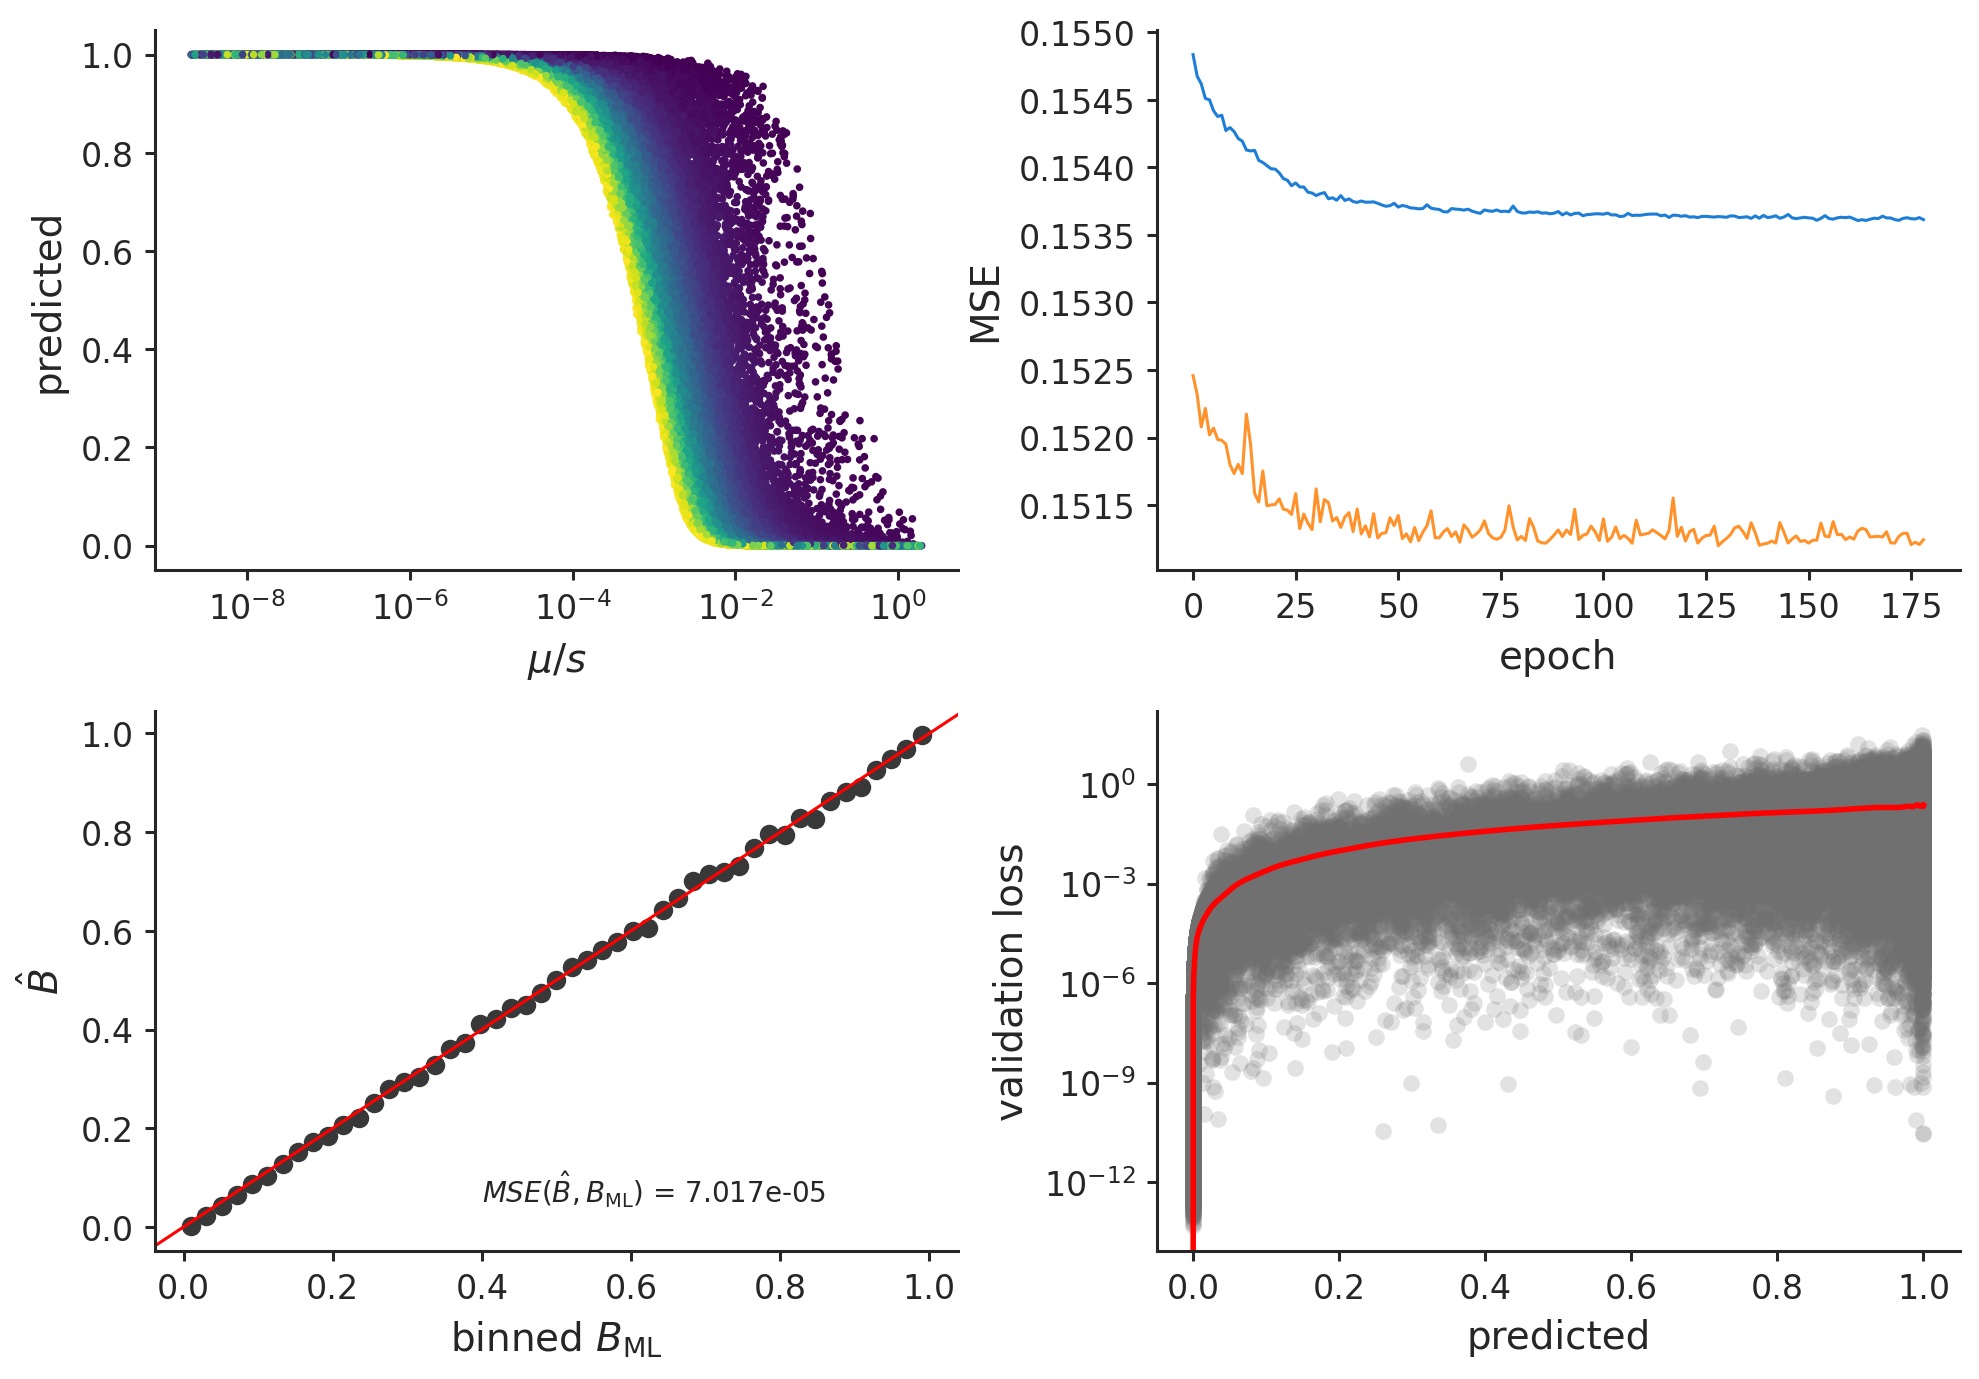

In [70]:
b_learn_diagnostic_plot(bseg, n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)